In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
train = pd.read_csv('Train.csv')
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
train.shape

(1763, 1559)

In [57]:
test = pd.read_csv('Test.csv')
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
test.shape

(756, 1558)

In [59]:
train.duplicated().sum()

48

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB


In [61]:
Class = train['Class']

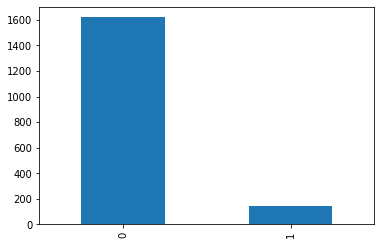

In [62]:
train['Class'].value_counts().plot(kind = 'bar')

In [63]:
train.drop('Class', axis = 1).T.drop_duplicates().T.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_1548', 'feature_1549', 'feature_1550', 'feature_1551',
       'feature_1552', 'feature_1553', 'feature_1554', 'feature_1555',
       'feature_1557', 'feature_1558'],
      dtype='object', length=729)

In [64]:
remove_duplicate = train.drop('Class', axis = 1).T.drop_duplicates().T.columns

In [65]:
test = test[remove_duplicate]

In [66]:
train = train[remove_duplicate]
train['Class'] = Class

In [67]:
train.shape

(1763, 730)

In [68]:
(train == 0).astype(int).sum(axis = 0)

feature_1          0
feature_2          0
feature_3          0
feature_4        486
feature_5       1758
feature_6       1758
feature_7       1749
feature_8       1759
feature_9       1755
feature_10      1741
feature_11      1759
feature_12      1752
feature_13      1752
feature_14      1755
feature_17      1758
feature_18      1756
feature_19      1752
feature_20      1755
feature_21      1759
feature_22      1752
feature_23      1753
feature_24      1758
feature_25      1756
feature_26      1756
feature_27      1756
feature_28      1757
feature_29      1759
feature_30      1753
feature_31      1756
feature_32      1753
                ... 
feature_1529    1761
feature_1530    1727
feature_1531    1753
feature_1532    1751
feature_1533    1707
feature_1534    1739
feature_1535    1757
feature_1536    1752
feature_1537    1752
feature_1538    1727
feature_1539    1752
feature_1540    1747
feature_1541    1759
feature_1542    1737
feature_1543    1740
feature_1544    1757
feature_1545 

In [69]:
zero_column = pd.DataFrame((train == 0).astype(int).sum(axis = 0))
zero_column.head()

,0
feature_1,0
feature_2,0
feature_3,0
feature_4,486
feature_5,1758


In [70]:
zero_column[zero_column[0]>1761].index

Index(['feature_46', 'feature_57', 'feature_150', 'feature_369', 'feature_568',
       'feature_1007', 'feature_1013'],
      dtype='object')

In [71]:
all_zero_columns = zero_column[zero_column[0]>1761].index

In [72]:
train = train.drop(all_zero_columns, axis = 1)

In [73]:
test = test.drop(all_zero_columns, axis = 1)

In [74]:
train.shape

(1763, 723)

In [75]:
test.shape

(756, 722)

In [77]:
train = train.drop_duplicates(keep= 'first')
train.shape

(1715, 723)

In [78]:
x_train = train.drop('Class', axis = 1)
y_train = train['Class']
x_test = test

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_pred = xgb.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Class': xgb_pred})
solution.to_csv('Solution1.csv', index = False)

In [84]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Class': lgbm_pred})
solution.to_csv('Solution2.csv', index = False)